In [196]:
import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import train_test_split

In [197]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [198]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [199]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [201]:
le=LabelEncoder()
list1=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))
df                                  

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 43.3 KB


In [203]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,306.500000,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,0.687296
std,177.390811,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


In [204]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [205]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term']=imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))

In [206]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [207]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

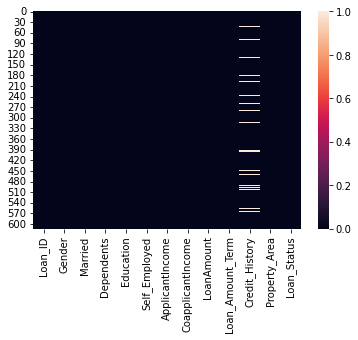

In [208]:
sns.heatmap(df.isnull())

In [209]:
df.dropna(inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [210]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

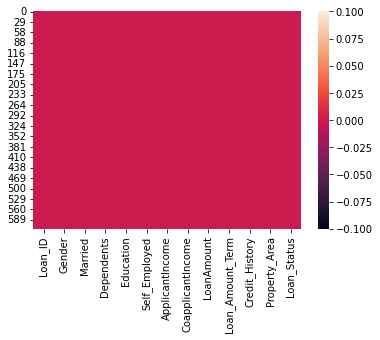

In [211]:
sns.heatmap(df.isnull())

In [212]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,305.819149,0.842199,0.652482,0.858156,0.214539,0.225177,5466.436170,1530.448440,145.137687,342.148936,0.842199,1.030142,0.682624
std,177.737006,0.419243,0.487657,1.136081,0.410867,0.516860,6271.344106,2471.721359,81.741320,63.778194,0.364878,0.784494,0.465868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,152.750000,1.000000,0.000000,0.000000,0.000000,0.000000,2892.750000,0.000000,101.750000,360.000000,1.000000,0.000000,0.000000
50%,303.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3815.000000,1105.500000,128.500000,360.000000,1.000000,1.000000,1.000000
75%,458.250000,1.000000,1.000000,2.000000,0.000000,0.000000,5803.750000,2250.000000,162.000000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [213]:
df.skew()

Loan_ID              0.009480
Gender              -0.966094
Married             -0.503320
Dependents           1.068337
Education            1.394501
Self_Employed        2.258657
ApplicantIncome      6.507081
CoapplicantIncome    6.000970
LoanAmount           2.685919
Loan_Amount_Term    -2.299917
Credit_History      -1.882361
Property_Area       -0.052969
Loan_Status         -0.786806
dtype: float64

In [214]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

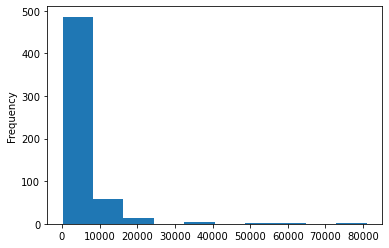

In [215]:
df['ApplicantIncome'].plot.hist()

In [216]:
df['ApplicantIncome']=np.log(df['ApplicantIncome'])

<AxesSubplot:ylabel='Frequency'>

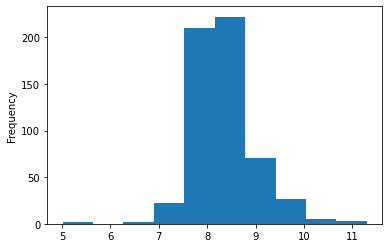

In [217]:
df['ApplicantIncome'].plot.hist()

In [218]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

<AxesSubplot:ylabel='Frequency'>

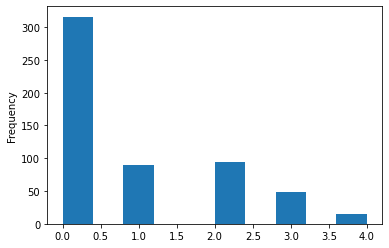

In [219]:
df['Dependents'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

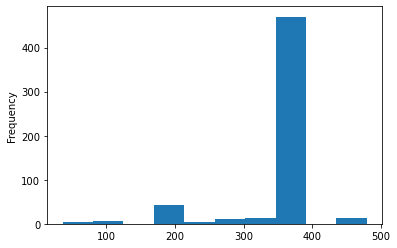

In [220]:
df['Loan_Amount_Term'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

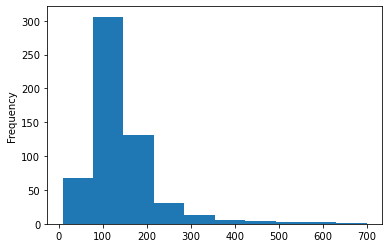

In [221]:
df['LoanAmount'].plot.hist()

In [222]:
df.skew()

Loan_ID              0.009480
Gender              -0.966094
Married             -0.503320
Dependents           1.068337
Education            1.394501
Self_Employed        2.258657
ApplicantIncome      0.540018
CoapplicantIncome    6.000970
LoanAmount           2.685919
Loan_Amount_Term    -2.299917
Credit_History      -1.882361
Property_Area       -0.052969
Loan_Status         -0.786806
dtype: float64

<AxesSubplot:ylabel='Frequency'>

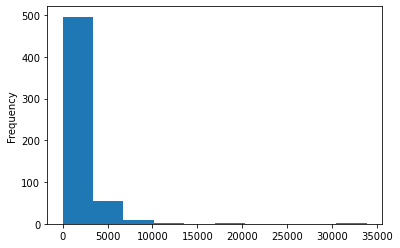

In [223]:
df['CoapplicantIncome'].plot.hist()

array([[<AxesSubplot:title={'center':'Loan_ID'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Property_Area'}>],
       [<AxesSubplot:title={'center':'Loan_Status'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

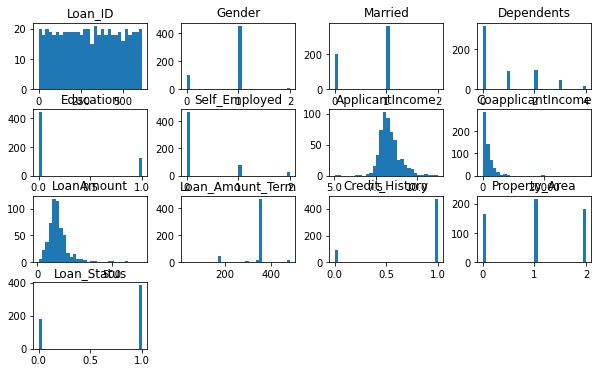

In [224]:
df.hist(grid=False,
       figsize=(10, 6),
       bins=30)

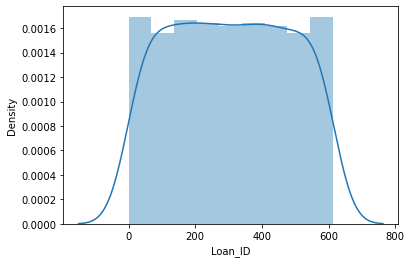

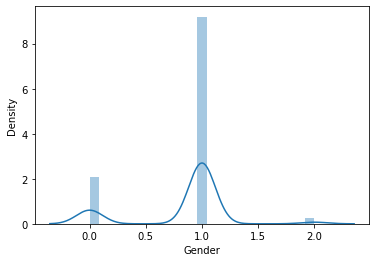

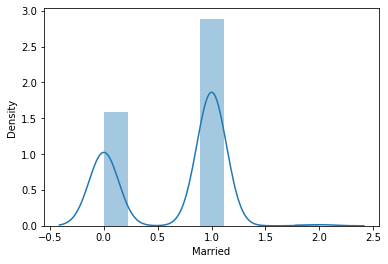

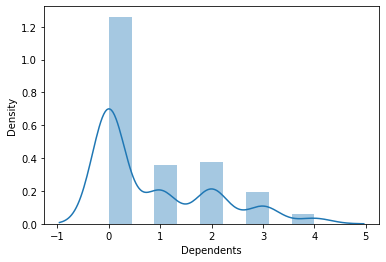

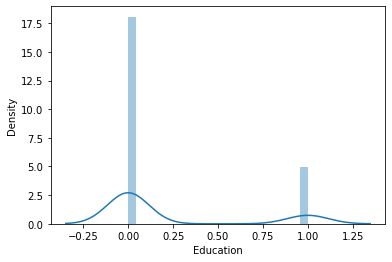

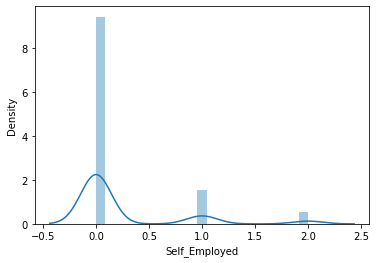

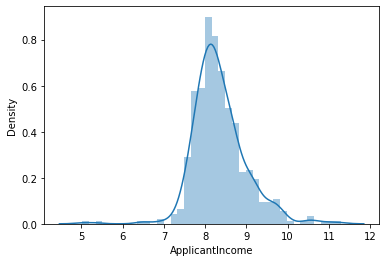

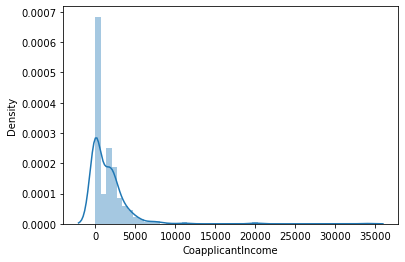

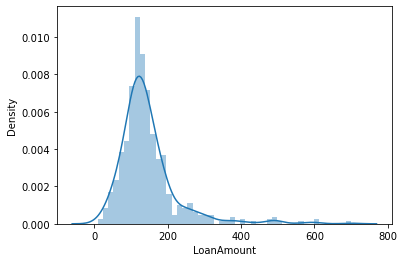

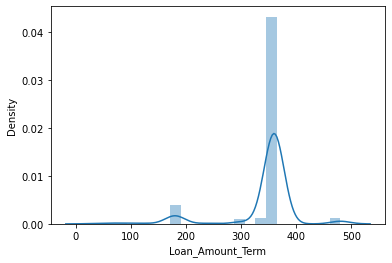

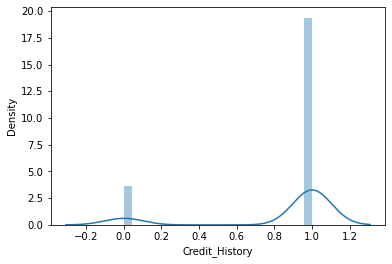

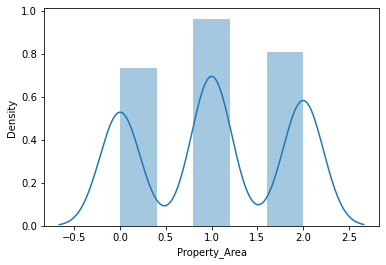

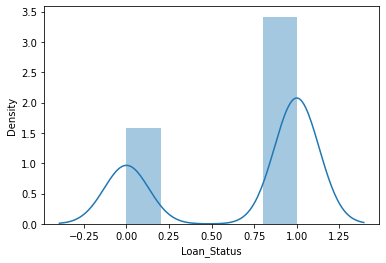

In [226]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

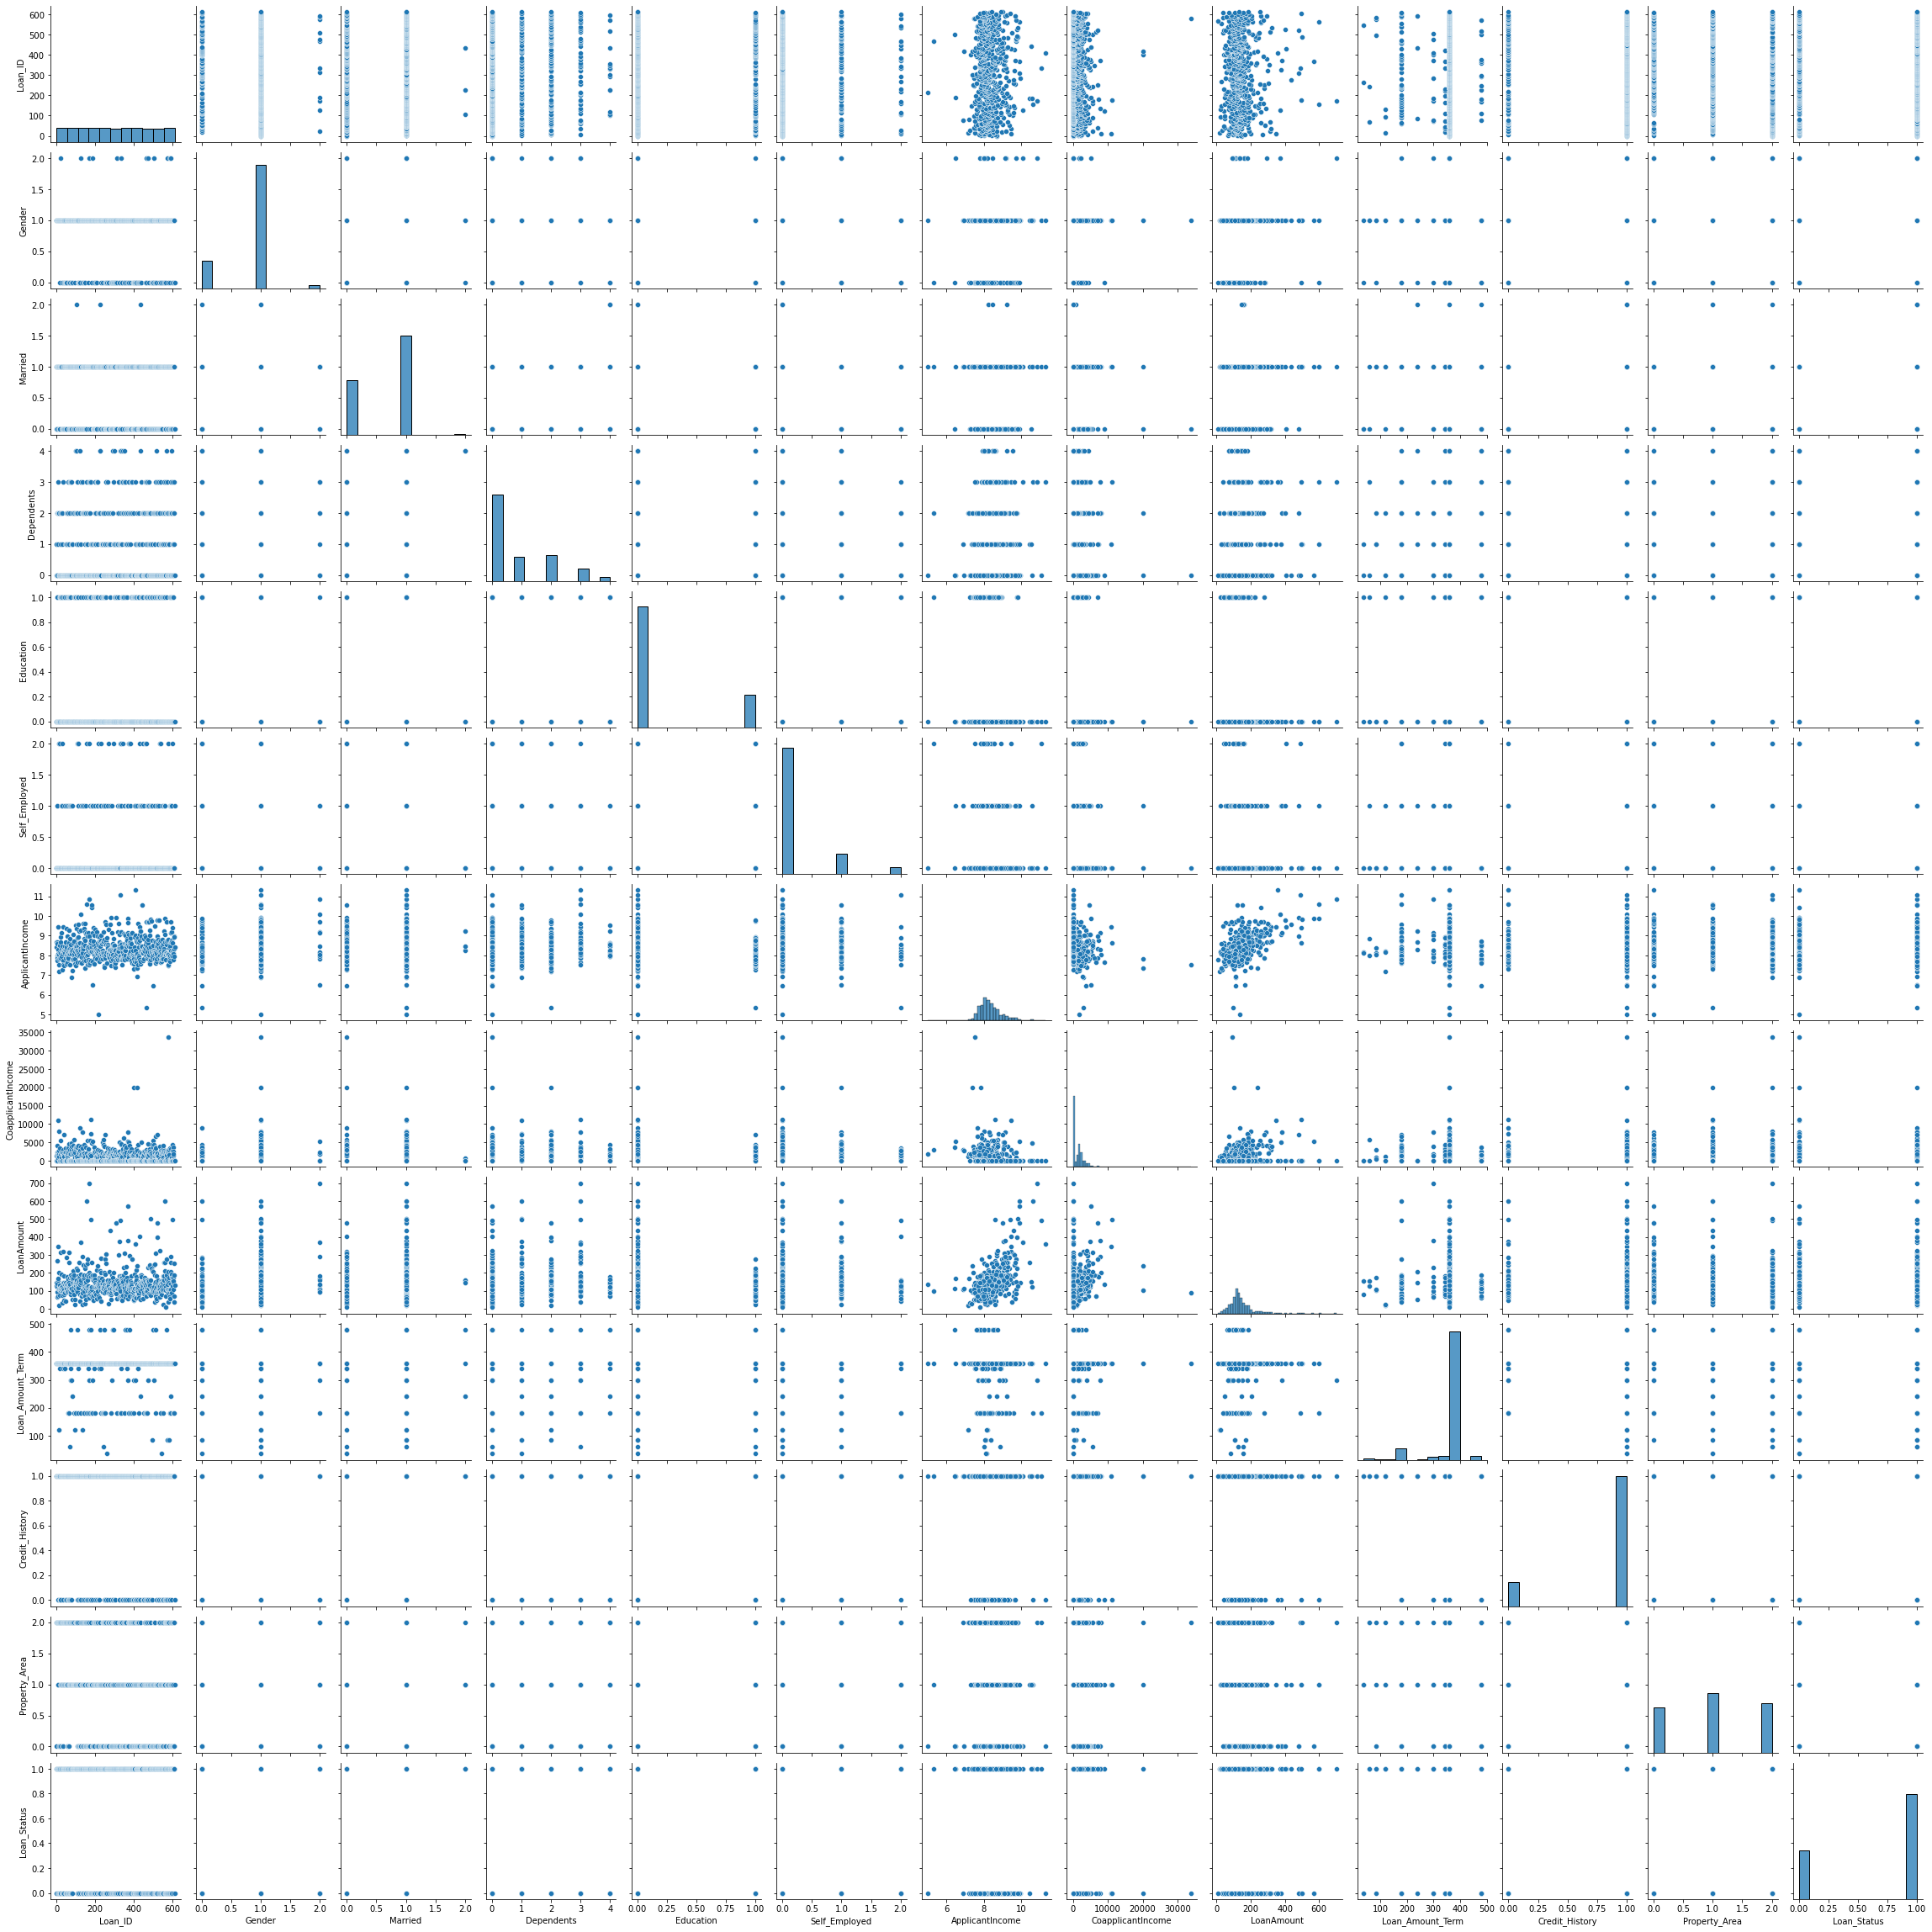

In [225]:
sns.pairplot(df)

In [227]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.001266,-0.018043,0.064412,0.032079,0.024555,0.031724,-0.007820,0.037946,-0.012836,-0.033772,-0.166251,0.004132
Gender,-0.001266,1.000000,0.330754,0.158028,0.021592,-0.032454,0.086071,0.135793,0.138440,-0.074051,-0.000515,-0.034117,0.025041
Married,-0.018043,0.330754,1.000000,0.356506,0.000440,-0.027238,0.021715,0.111937,0.167895,-0.099416,0.010690,0.018143,0.092212
Dependents,0.064412,0.158028,0.356506,1.000000,0.038673,0.000043,0.136574,-0.027965,0.148428,-0.063542,-0.079801,0.038686,0.005403
Education,0.032079,0.021592,0.000440,0.038673,1.000000,-0.002061,-0.195837,-0.054520,-0.166952,-0.090288,-0.081822,-0.058673,-0.098340
Self_Employed,0.024555,-0.032454,-0.027238,0.000043,-0.002061,1.000000,0.094643,-0.015697,0.058931,-0.033672,0.056894,-0.060574,0.053899
ApplicantIncome,0.031724,0.086071,0.021715,0.136574,-0.195837,0.094643,1.000000,-0.201192,0.564823,-0.053057,0.020010,-0.031766,0.010486
CoapplicantIncome,-0.007820,0.135793,0.111937,-0.027965,-0.054520,-0.015697,-0.201192,1.000000,0.157739,-0.001539,-0.002056,-0.012529,-0.033784
LoanAmount,0.037946,0.138440,0.167895,0.148428,-0.166952,0.058931,0.564823,0.157739,1.000000,0.022808,-0.008301,-0.079016,-0.031320
Loan_Amount_Term,-0.012836,-0.074051,-0.099416,-0.063542,-0.090288,-0.033672,-0.053057,-0.001539,0.022808,1.000000,0.001470,-0.078474,-0.018134


<AxesSubplot:>

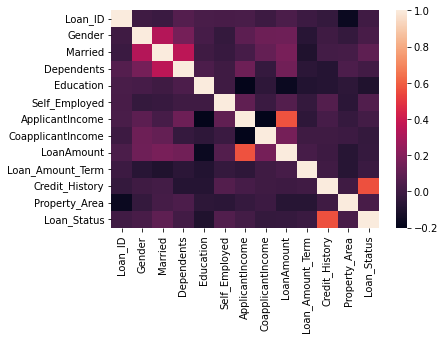

In [228]:
sns.heatmap(df.corr())

Loan_ID                 AxesSubplot(0.125,0.657941;0.0731132x0.222059)
Gender               AxesSubplot(0.212736,0.657941;0.0731132x0.222059)
Married              AxesSubplot(0.300472,0.657941;0.0731132x0.222059)
Dependents           AxesSubplot(0.388208,0.657941;0.0731132x0.222059)
Education            AxesSubplot(0.475943,0.657941;0.0731132x0.222059)
Self_Employed        AxesSubplot(0.563679,0.657941;0.0731132x0.222059)
ApplicantIncome      AxesSubplot(0.651415,0.657941;0.0731132x0.222059)
CoapplicantIncome    AxesSubplot(0.739151,0.657941;0.0731132x0.222059)
LoanAmount           AxesSubplot(0.826887,0.657941;0.0731132x0.222059)
Loan_Amount_Term        AxesSubplot(0.125,0.391471;0.0731132x0.222059)
Credit_History       AxesSubplot(0.212736,0.391471;0.0731132x0.222059)
Property_Area        AxesSubplot(0.300472,0.391471;0.0731132x0.222059)
Loan_Status          AxesSubplot(0.388208,0.391471;0.0731132x0.222059)
dtype: object

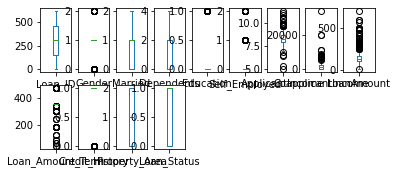

In [229]:
df.plot(kind='box',subplots=True,layout=(3,9))

<AxesSubplot:>

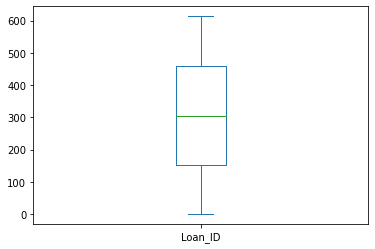

In [233]:
df['Loan_ID'].plot.box()

<AxesSubplot:>

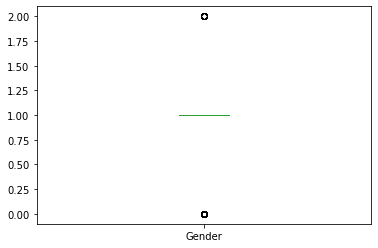

In [234]:
df['Gender'].plot.box()

<AxesSubplot:>

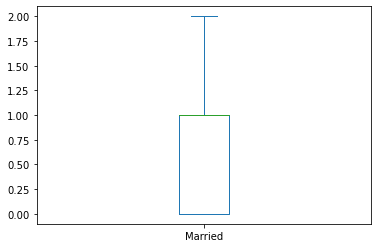

In [235]:
df['Married'].plot.box()

<AxesSubplot:>

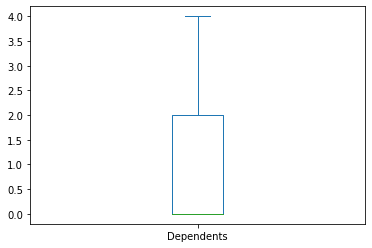

In [236]:
df['Dependents'].plot.box()

<AxesSubplot:>

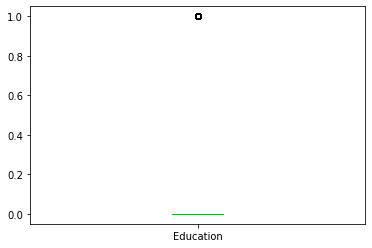

In [237]:
df['Education'].plot.box()

<AxesSubplot:>

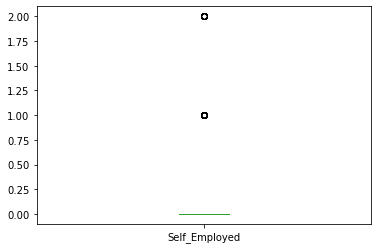

In [238]:
df['Self_Employed'].plot.box()

<AxesSubplot:>

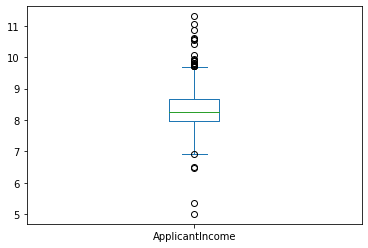

In [239]:
df['ApplicantIncome'].plot.box()

<AxesSubplot:>

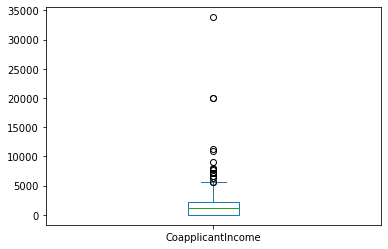

In [240]:
df['CoapplicantIncome'].plot.box()

<AxesSubplot:>

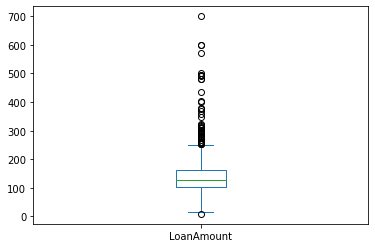

In [241]:
df['LoanAmount'].plot.box()

<AxesSubplot:>

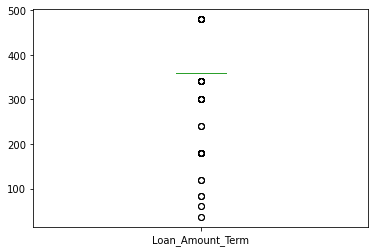

In [242]:
df['Loan_Amount_Term'].plot.box()

<AxesSubplot:>

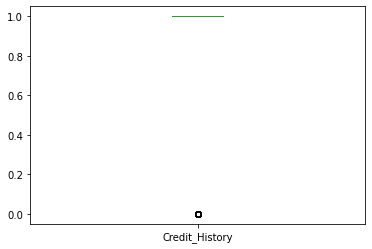

In [243]:
df['Credit_History'].plot.box()

<AxesSubplot:>

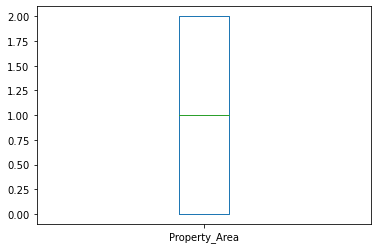

In [244]:
df['Property_Area'].plot.box()

<AxesSubplot:>

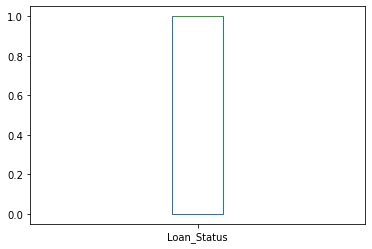

In [245]:
df['Loan_Status'].plot.box()

In [232]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [246]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,8.674026,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,8.430109,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,8.006368,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,7.856707,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,8.699515,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,7.972466,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,8.320205,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8.996157,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,8.933664,0.0,187.000000,360.0,1.0,2,1


In [247]:
threshold=3
print(np.where(z>3))

(array([  9,  11,  14,  18,  27,  64,  87,  99, 103, 106, 113, 121, 143,
       143, 145, 157, 158, 158, 164, 164, 169, 171, 200, 202, 214, 223,
       241, 247, 257, 273, 286, 306, 306, 306, 309, 317, 340, 345, 350,
       355, 370, 377, 384, 399, 399, 410, 413, 426, 431, 431, 449, 455,
       480, 482, 490, 497, 500, 514, 527, 531, 533, 536, 551, 554],
      dtype=int64), array([7, 5, 9, 5, 5, 9, 9, 5, 5, 5, 7, 9, 6, 8, 5, 5, 6, 8, 7, 8, 6, 6,
       6, 5, 5, 9, 9, 5, 8, 5, 8, 5, 6, 8, 5, 5, 8, 5, 5, 5, 7, 6, 7, 5,
       8, 6, 5, 5, 5, 6, 8, 9, 8, 8, 5, 5, 9, 8, 9, 5, 7, 9, 5, 8],
      dtype=int64))


In [248]:
df_new=df[(z<3).all(axis=1)]

In [249]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,8.674026,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,8.430109,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,8.006368,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,7.856707,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,8.699515,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,7.972466,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,8.320205,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8.996157,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,8.933664,0.0,187.000000,360.0,1.0,2,1


In [250]:
x=df_new.iloc[:,0:-1]
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,8.674026,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,0,8.430109,1508.0,128.000000,360.0,1.0,0
2,2,1,1,0,0,1,8.006368,0.0,66.000000,360.0,1.0,2
3,3,1,1,0,1,0,7.856707,2358.0,120.000000,360.0,1.0,2
4,4,1,0,0,0,0,8.699515,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,7.972466,0.0,71.000000,360.0,1.0,0
610,610,1,1,3,0,0,8.320205,0.0,40.000000,180.0,1.0,0
611,611,1,1,1,0,0,8.996157,240.0,253.000000,360.0,1.0,2
612,612,1,1,2,0,0,8.933664,0.0,187.000000,360.0,1.0,2


In [251]:
x.shape

(507, 12)

In [252]:
y=df_new.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 507, dtype: int32

In [253]:
y.shape

(507,)

In [254]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.40,random_state=45)

In [255]:
x_train.shape

(304, 12)

In [256]:
y_train.shape

(304,)

In [257]:
x_test.shape

(203, 12)

In [258]:
y_test.shape

(203,)

In [273]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))      

0.6348314606741573
[[ 12  41]
 [ 24 101]]
              precision    recall  f1-score   support

           0       0.33      0.23      0.27        53
           1       0.71      0.81      0.76       125

    accuracy                           0.63       178
   macro avg       0.52      0.52      0.51       178
weighted avg       0.60      0.63      0.61       178



# using logistic model

In [262]:
from sklearn.linear_model import LogisticRegression

In [264]:
lg=LogisticRegression()

In [265]:
lg.fit(x_train,y_train)

LogisticRegression()

In [266]:
lg.coef_

array([[ 1.45985923e-03, -3.96794720e-02,  1.00133508e+00,
        -2.18761940e-01, -3.63529421e-01, -2.50575203e-01,
        -1.69425649e-01,  2.65609152e-05,  7.89701638e-04,
        -2.81081004e-03,  3.24434822e+00, -3.19993730e-01]])

In [267]:
lg.intercept_

array([-0.04882411])

In [268]:
lg.score(x_train,y_train)

0.8256578947368421

In [270]:
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))  

0.8275862068965517
[[ 34  33]
 [  2 134]]
              precision    recall  f1-score   support

           0       0.94      0.51      0.66        67
           1       0.80      0.99      0.88       136

    accuracy                           0.83       203
   macro avg       0.87      0.75      0.77       203
weighted avg       0.85      0.83      0.81       203



# using mnb model

In [271]:
from sklearn.naive_bayes import MultinomialNB

In [274]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35,random_state=48)

In [276]:
mnb=MultinomialNB()

In [277]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [278]:
mnb.coef_

array([[-2.05611931, -7.88205763, -8.11705123, -7.89258405, -9.28418346,
        -9.73313368, -5.62117452, -0.42422807, -2.81671982, -1.88231592,
        -7.75443371, -7.62899953]])

In [279]:
mnb.intercept_

array([-0.4024302])

In [280]:
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb)) 

0.48314606741573035
[[29 24]
 [68 57]]
              precision    recall  f1-score   support

           0       0.30      0.55      0.39        53
           1       0.70      0.46      0.55       125

    accuracy                           0.48       178
   macro avg       0.50      0.50      0.47       178
weighted avg       0.58      0.48      0.50       178

